<img style ="float:right" src = "https://d1vwxdpzbgdqj.cloudfront.net/s3-public-images/learning-partners/greatlearning-brand.svg" width=15%>

# **Case Study: Yelp Restaurant Recommendation System**

---------------
## **Context**
---------------

**Yelp** was founded in **2004** to help people find **great local businesses**. Today, the website and their mobile application publish crowd-sourced reviews about local businesses as well as certain metadata about them that can help in customer's **decision-making process**. Yelp uses automated software to recommend the **most helpful** and **reliable reviews** for the Yelp community from such a large and diverse dataset.

The Yelp dataset is a large collection of user reviews, business metadata, business check-ins, users' social network data, user tips for businesses across 10 cities spread across **4 countries**. The original dataset is very huge with ~ 11GB of data. In this case study, we will only use a subset of data due to the hardware limitations.

-----------------
## **Objective**
-----------------

In this case study, we will build three types of recommendation systems: 
- **Knowledge/Rank Based recommendation system**
- **Similarity-Based Collaborative filtering**
- **Matrix Factorization Based Collaborative Filtering**


-----------------
## **Dataset**
-----------------

Out of many attributes available in the yelp_reviews data, we will only use the following four attributes:
- business_id
- business_name
- stars
- user_id

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this case study.

Let's start by mounting the Google drive on Colab.

In [1]:
# uncomment if you are using google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries and overview of the dataset**

In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np, pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# A dictionary output that does not raise a key error
from collections import defaultdict

### **Loading the data**

In [3]:
# Importing the dataset
data = pd.read_excel('/content/drive/MyDrive/Restaurant Ratings Data.xlsx')

Let's check the **info** of the data

In [4]:
# This method is used to get the info of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223538 entries, 0 to 223537
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   business_id    223527 non-null  object
 1   business_name  223538 non-null  object
 2   user_id        223538 non-null  object
 3   stars          223538 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.8+ MB


- There are **223538 observations** and **4 columns** in the data

## **Data Exploration**

Let's start with the data exploration.

**We will first see the first five records of the data.**

In [5]:
# The head method is used to display the first five records of the dataset
data.head()

,business_id,business_name,user_id,stars
0,9yKzy9PApeiPPOUJEtnvkg,Morning Glory Cafe,rLtl8ZkDX5vH5nAx9C3q5Q,5
1,ZRJwVLyzEJq1VAihDhYiow,Spinato's Pizzeria,0a2KyEL0d3Yb1V6aivbIuQ,5
2,6oRAC4uyJCsJl1X0WZpVSA,Haji-Baba,0hT2KtfLiobPvh6cDC8JQg,4
3,_1QQZuf4zZOyFCvXc0o6Vg,Chaparral Dog Park,uZetl9T0NcROGOyFfughhg,5
4,6ozycU1RpktNG2-1BroVtw,Discount Tire,vYmM4KTsC8ZfQBg-j5MWkw,5


#### **Describe the distribution of ratings**

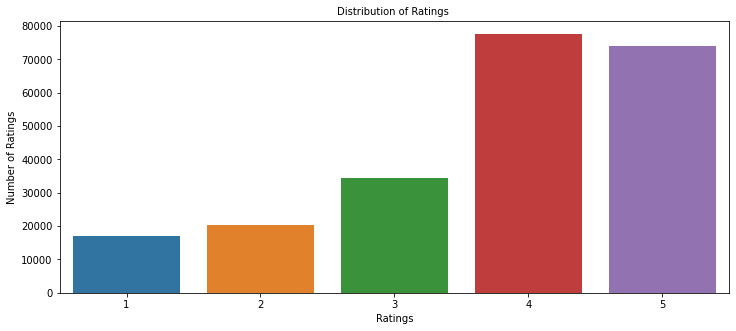

In [6]:
# Fix the figure size
plt.figure(figsize = (12, 5))

ax = sns.countplot(x = "stars", data = data)

plt.tick_params(labelsize = 10)

plt.title("Distribution of Ratings ", fontsize = 10)

# Set the xlabel of the plot
plt.xlabel("Ratings", fontsize = 10)

# Set the ylabel of the plot
plt.ylabel("Number of Ratings", fontsize = 10)

# Display the plot
plt.show()

In [7]:
data.stars.value_counts(normalize=True)

4    0.347422
5    0.331536
3    0.153594
2    0.091282
1    0.076166
Name: stars, dtype: float64

**Observations:**

* The data seems to be **highly skewed** towards Rating **'4' and '5'**. Rating **'5'** is the second-highest in the count and nearly the same as the number of 4 rating count. 

* We can see very few people are giving ratings **between 1 to 3**. It shows people tend to **not give a rating** for a restaurant that they **don't like**.

#### **What is the total number of unique users and unique restaurants**?

In [8]:
# Number of unique users
data['user_id'].nunique()

45066

In [9]:
# Number of unique Restaurant 
data['business_id'].nunique()

11375

**Observations:**
- There are **45,066 unique users** in the dataset.
- There are **11375 unique Restaurants** in the dataset.
- As per the number of unique users and Restaurant, there is a **possibility of 45066 * 11375 = ~51x10^7 ratings** in the dataset. But **we  have 223538 ratings**, i.e. not every user has rated every Restaurant in the dataset. And we can build a recommendation system to recommend restaurant to users which they have not interacted with.

#### **Is there any restaurant that has been interacted with more than once by the same user?**

In [10]:
data.groupby(['user_id', 'business_id']).count()

business_name  stars
user_id                business_id                                 
--5hzxWLz5ozIg6OMo6tpQ Z3n01OZqARDv06QgBneOZw              1      1
--65q1FpAL_UQtVZ2PTGew 0vzZ_Bcb02rJljeMU9XkBw              1      1
                       18TUn9oiW0k0yB6lheiOvw              1      1
                       1NZLxU5WvB5roPFzneAlLw              1      1
                       1xu5wFd0TeBg6xNBiRtknw              1      1
...                                                      ...    ...
zztT9KKp0rmJRMeMl4CqzQ A8Khz3eeqIFFGaXurg3hxw              1      1
                       ilJiRYZgxjrEu2iexKu-pQ              1      1
                       sbsFamEj5wDxNAjUKrMcSw              1      1
                       wP5849J1DKB2KS3M6UwOAg              1      1
zzunUJtZqhcxDB3plnSFxg kuGQG_8i9P-4p9_Mym-G8Q              1      1

[223526 rows x 2 columns]

In [11]:
# Find the sum of total ratings count by each user restaurant pair
data.groupby(['user_id', 'business_id']).count()['stars'].sum()

223527

- The **sum is equal to the total number of observations** which implies that **there is only interaction between a pair of restaurant and a user**.

#### **Which is the most reviewed restaurant in the dataset?**

In [12]:
data['business_id'].value_counts()

hW0Ne_HTHEAgGF1rAdmR-g    832
VVeogjZya58oiTxK7qUjAQ    784
JokKtdXU7zXHcr20Lrk29A    718
ntN85eu27C04nwyPa8IHtw    671
EWMwV5V9BxNs_U6nNVMeqw    638
                         ... 
n3aU1lbFdHvQ6LIMGd1kRQ      2
sAwxt4I4gTiL-08nyarJbg      2
6JKOKRgtnJWn3KgsgFYaYw      2
3ZXpAvE6KT3oJm1FUvuEVQ      1
2eedL3hDviwReK0w1NkRIw      1
Name: business_id, Length: 11375, dtype: int64

**Observations:**
- The **Restaurant with business_id:hW0Ne_HTHEAgGF1rAdmR-g  has been interacted by most users** which is **832** times.
- But still, there is a possibility of **45066-832 = 44254** more interactions as we have 45066 unique users in our datasets.For those  **remaining users**, we can build a **recommendation system** to predict who is most likely to visit this restaurant.

Also, out of these **832 interactions**, we need to consider the distribution of ratings as well to check whether this Restaurant is the **most liked or most disliked Restaurant.**

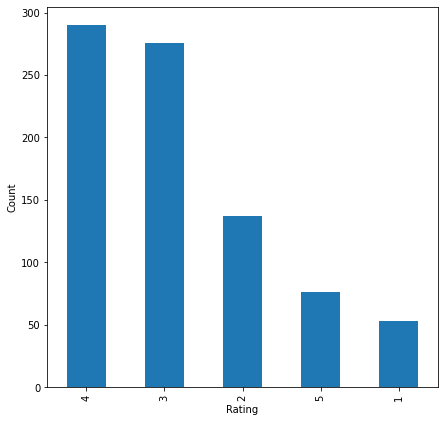

In [13]:
# Plotting distributions of ratings for 832 interactions with given business_id 
plt.figure(figsize=(7,7))

data[data['business_id'] == "hW0Ne_HTHEAgGF1rAdmR-g"]['stars'].value_counts().plot(kind='bar')

# Name the xlabel of the plot
plt.xlabel('Rating')

# Name the ylabel of the plot
plt.ylabel('Count')

# Display the plot
plt.show()

**Observations:**
- We can see that **this restaurant is not liked by many of the users**, as the count of ratings 3 and 4 is higher than the count of other ratings.
- There can be restaurants with very high interactions but the count of ratings **1 and 2** may be much higher than **4 or 5** which would imply that the restaurant is disliked by the majority of the users.

#### **Which user visited the most to any restaurant in the dataset?**

In [14]:
data['user_id'].value_counts()

fczQCSmaWF78toLEmb0Zsw    582
90a6z--_CUrl84aCzZyPsg    499
0CMz8YaO3f8xu4KqQgKb9Q    470
4ozupHULqGyO42s3zNUzOQ    437
joIzw_aUiNvBTuGoytrH7g    386
                         ... 
0UN28H98ypsqziR4OtxpSA      1
ff3NqoaitypL0N7dL-ZITw      1
51c601DXEPbcZ2XmhbGsFg      1
w_Xer9xDkD1vQhKMR8Wi4w      1
dDNfSFT0VApxPmURclX6_g      1
Name: user_id, Length: 45066, dtype: int64

**Observations:**
- The user with **user_id: fczQCSmaWF78toLEmb0Zsw** has interacted with the most number of Restaurant i.e. **582** times. 
- But still, there is a possibility of **11375-520 =  10855** more interactions as we have **11375 unique Restaurants** in our dataset. For those **10855** remaining Restaurants, we can build a recommendation system to predict which Restaurant are most likely to be reviews by this user.

**As this dataset is very large and has 223538 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few restaurants and also some restaurants are rated by very less users. Hence we can reduce the dataset by considering certain Logical assumptions.**

Here, We will be taking users who have given at least 50 rating, as we prefer to have some number of rating of a restaurant and the restaurant who has at least 10 rating, as when we shop online we prefer to have some number of rating of a restaurant. . 

In [15]:
# Get the column containing the users
users = data.user_id
# Create a dictionary from users to their number of ratings
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1   

In [16]:
# We want our users to have at least 50 ratings to be considred
RATINGS_CUTOFF = 50
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
data = data.loc[~data.user_id.isin(remove_users)]

In [17]:
# Get the column containing the users
users = data.business_id
# Create a dictionary from users to their number of ratings
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [18]:
# We want our item to have at least 10 ratings to be considred
RATINGS_CUTOFF = 10
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
rating = data.loc[~data.business_id.isin(remove_users)]

In [19]:
data.shape

(65387, 4)

#### **What is the distribution of the user-Restaurant interactions in this dataset?**

In [20]:
# Finding user-Restaurant interactions distribution
count_interactions = data.groupby('user_id').count()['business_id']
count_interactions

user_id
--65q1FpAL_UQtVZ2PTGew    115
-7LfdqX286W8zJ01ljY_SQ     54
-9mljS0O9mwdOnGv-Oea3Q     98
04xW5mhSBaCzpjbcf2VSZg     84
0CMz8YaO3f8xu4KqQgKb9Q    470
                         ... 
zLIV35n1gZ4fg6cGSRqNIA     63
zfysCL-0uQNCWdGvzZ6QWA     98
zgCO0TnkvfohTmwPTwP7Ew    140
zhVOlwBuEgdGlHjwgVf3Jg     83
zqnAdayPsak5dbLF2gEvNw     54
Name: business_id, Length: 654, dtype: int64

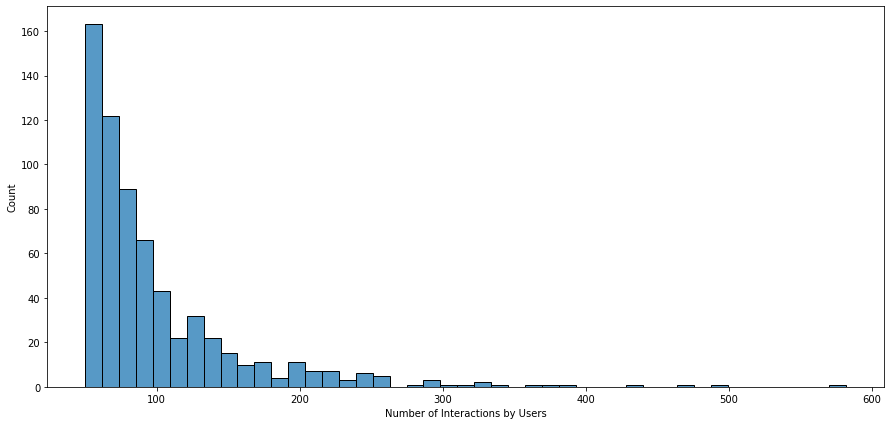

In [21]:
# Plotting user-item interactions distribution
plt.figure(figsize=(15,7))

sns.histplot(count_interactions)

plt.xlabel('Number of Interactions by Users')

plt.show()

- It is very skewed and clearly shows that there are very few restaurants that have many ratings.

**As we have now explored the data, let's start building the Recommendation systems**

## **Model 1: Building Rank-Based Recommendation System**

Rank-based recommendation systems provide recommendations based on the most popular items. This kind of recommendation system is useful when we have **cold start** problems. Cold start refers to the issue when we get a new user into the system and the machine is not able to recommend Restaurant to the new user, as the user did not have any historical interactions in the dataset. In those cases, we can use rank-based recommendation system to recommend Restaurant to the new user.

To build the rank-based recommendation system, we take **average** of all the ratings provided to each Restaurant and then rank them based on their average rating.

In [22]:
# Calculating average ratings
average_rating = data.groupby('business_id').mean()['stars']

# Calculating the count of ratings
count_rating = data.groupby('business_id').count()['stars']

# Making a dataframe with the count and average of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

In [23]:
# Let us see the first 5 records of the final_rating
final_rating.head()

,avg_rating,rating_count
business_id,,
--5jkZ3-nUPZxUvtcbr8Uw,5.000000,2
-0D_CYhlD2ILkmLR0pBmnA,5.000000,1
-0QBrNvhrPQCaeo7mTo0zQ,4.333333,3
-0bUDim5OGuv8R0Qqq6J4A,4.000000,1
-0xwm_AwS0d_5rwUprHGuw,3.428571,7


Now, let's create a function to find the **top n Restaurant** for a recommendation based on the average ratings of Restaurant. We can also add a **threshold for a minimum number of interactions** for a Restaurant to be considered for recommendation. 

In [24]:
def top_n_Restaurant(data, n, min_interaction=100):
    
    # Finding restautants with minimum number of interactions
    recommendations = data[data['rating_count'] > min_interaction]
    
    # Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values(by='avg_rating', ascending=False)
    
    return recommendations.index[:n]

We can **use this function with different n's and minimum interactions** to get Restaurant to recommend

#### **Recommending top 5 Restaurant with 50 minimum interactions based on popularity**



In [25]:
list(top_n_Restaurant(final_rating, 5, 50))

['xHI3saK0sAJEHeMK4IGVvg',
 'Bc4DoKgrKCtCuN-0O5He3A',
 '6rijZ1qIjiq1Dgdy35iqxw',
 'u0NbikWwP7TVkMkCily-4g',
 'qMkIbQFrROSnPaQ7at85-w']

Now, that we have seen **how to apply the Rank-Based Recommendation System**, let's apply the **Collaborative Filtering Based Recommendation System**.

## **Collaborative Filtering Based Recommendation System**.



In this type of recommendation system, `we do not need any information` about the users or items. We only need user item interaction data to build a collaborative recommendation system. For example - 
<ol>
    <li><b>Ratings</b> provided by users. For example - ratings of books on goodread, movie ratings on imdb etc</li>
    <li><b>Likes</b> of users on different facebook posts, likes on youtube videos</li>
    <li><b>Use/buying</b> of a product by users. For example - buying different items on e-commerce sites</li>
    <li><b>Reading</b> of articles by readers on various blogs</li>
</ol>

#### **Types of Collaborative Filtering**

- Similarity/Neighborhood-based
 * User-User Similarity-Based  
 * Item-Item Similarity-based
- Model based

### **Building a baseline user-user similarity based recommendation system.**

- Below we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library - `surprise` to build the remaining models, let's first import the necessary classes and functions from this library.
- Please use the following code to `install the surprise` library. You only do it **once** while running the code for the first time.

**!pip install surprise**

In [26]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing K-Fold cross-validation
from surprise.model_selection import KFold

**Let's encode the user_id and business_id for simplicity, also encoding them will not make any change in the prediction.** 

In [28]:
from sklearn.preprocessing import LabelEncoder
df=data[['user_id','business_id']].apply(LabelEncoder().fit_transform)
df['rating']=data['stars']
df.head()

,user_id,business_id,rating
0,568,1476,5
5,620,8973,5
10,311,6352,5
11,343,4694,4
14,291,8026,3


#### **Making the dataset into surprise dataset and splitting it into train and test set**

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**.


In [29]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df[['user_id', 'business_id', 'rating']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

- Now we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.
- **KNNBasic** is an algorithm that is also **associated with the surprise package**, it is used to find the **desired similar items among a given set of items**.

## **Model 2: Building User-User Collaborative Filtering Model**

In [30]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
algo_knn_user = KNNBasic(sim_options=sim_options,verbose=False)

# Train the algorithm on the trainset, and predict ratings for the testset
algo_knn_user.fit(trainset)
predictions = algo_knn_user.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 1.0516


1.0515902715343899

- As we can see from above, these baseline model has **`RMSE=1.05`** on test set.  We will try to improve the performance of the model using **GridSearchCV by tuning different hyperparameters** of this algorithm.


**Let's now predict rating for a user with `userId = 1` and `businessId = 126`as shown below. Here the user has already interacted with businessId `126` and given a rating of 4 which is denoted by the parameter r_ui.**

In [31]:
algo_knn_user.predict(1,126, r_ui=4, verbose=True)

user: 1          item: 126        r_ui = 4.00   est = 3.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid=1, iid=126, r_ui=4, est=3.0, details={'actual_k': 1, 'was_impossible': False})

- As we can see - the actual rating for this user-item pair is 4 and predicted rating is 3 by this similarity based baseline model

**Let's predict the rating for the same user `userId=1` but for a restaurant which this user has not a rated before i.e. `business_id=2150`**

In [32]:
algo_knn_user.predict(1,2150, verbose=True)

user: 1          item: 2150       r_ui = None   est = 4.67   {'actual_k': 9, 'was_impossible': False}


Prediction(uid=1, iid=2150, r_ui=None, est=4.665900876518288, details={'actual_k': 9, 'was_impossible': False})

- As we can see the estimated rating for this user-item pair is 4.67 based on this similarity based baseline model.

### **Improving similarity based recommendation system by tuning its hyper-parameters**

Below we will be tuning hyper-parmeters for the `KNNBasic` algorithms. Let's try to understand different hyperparameters of KNNBasic algorithm - 

- **k** (int) – The (max) number of neighbors to take into account for aggregation (see this note). Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - pearson
    - pearson baseline
    
For more details please refer the official documentation https://surprise.readthedocs.io/en/stable/knn_inspired.html

In [33]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0301120143948717
{'k': 40, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters** as shown above.

Below we are analysing evaluation metrics - RMSE and MAE at each and every split to analyze the impact of each value of hyperparameters

In [34]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_min_k,param_sim_options
0,1.024663,1.031043,1.042393,1.032700,0.007332,10,0.806292,0.805868,0.811799,0.807986,0.002702,5,0.070619,0.026839,1.775669,0.507783,"{'k': 20, 'min_k': 3, 'sim_options': {'name': ...",20,3,"{'name': 'msd', 'user_based': True}"
1,1.025192,1.030692,1.040378,1.032087,0.006278,7,0.807485,0.806113,0.810481,0.808026,0.001824,6,0.508844,0.007665,2.019700,0.130466,"{'k': 20, 'min_k': 3, 'sim_options': {'name': ...",20,3,"{'name': 'cosine', 'user_based': True}"
2,1.028184,1.031103,1.039740,1.033009,0.004907,11,0.813407,0.809368,0.812264,0.811680,0.001700,11,0.130485,0.024182,2.277864,0.352769,"{'k': 20, 'min_k': 6, 'sim_options': {'name': ...",20,6,"{'name': 'msd', 'user_based': True}"
3,1.029979,1.032082,1.038775,1.033612,0.003750,12,0.815111,0.810549,0.811758,0.812473,0.001930,12,0.366833,0.079772,1.232287,0.214118,"{'k': 20, 'min_k': 6, 'sim_options': {'name': ...",20,6,"{'name': 'cosine', 'user_based': True}"
4,1.036272,1.033603,1.042815,1.037563,0.003870,17,0.822265,0.813537,0.816489,0.817431,0.003625,17,0.045165,0.000508,1.092661,0.007713,"{'k': 20, 'min_k': 9, 'sim_options': {'name': ...",20,9,"{'name': 'msd', 'user_based': True}"


Now let's build the **final model by using tuned values of the hyperparameters** which we received by using **grid search cross-validation**

In [35]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized = KNNBasic(sim_options=sim_options, k=40, min_k=6,Verbose=False)

# Training the algorithm on the trainset
similarity_algo_optimized.fit(trainset)

# Predicting ratings for the testset
predictions = similarity_algo_optimized.test(testset)

# Computing RMSE on testset
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0344


1.034374468962248

- We can see from above that after tuning hyperparameters, RMSE for testset has reduced to 1.05 from 1.03. We can say that we have been able to improve the model after hyperparameter tuning

**Let's now predict the rating for a user with `userId=1` and `business_id=126` with the optimized model as shown below**

In [36]:
similarity_algo_optimized.predict(1,126, r_ui=4, verbose=True)

user: 1          item: 126        r_ui = 4.00   est = 3.72   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=1, iid=126, r_ui=4, est=3.723661787196854, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

- If we compare the above-predicted ratings, we can see that the baseline model predicted `3.0` and the optimized model predicted `3.72` whereas the actual rating is `4` i.e. predicted rating from the optimized model is closer to the actual rating.

**Let's predict the rating for the same user `userId=1` but for a restaurant which this user has not a rated before i.e. `business_id=2150`**

In [37]:
similarity_algo_optimized.predict(1,2150, verbose=True)

user: 1          item: 2150       r_ui = None   est = 4.67   {'actual_k': 9, 'was_impossible': False}


Prediction(uid=1, iid=2150, r_ui=None, est=4.665900876518288, details={'actual_k': 9, 'was_impossible': False})

- If we compare the above-predicted rating, we can see the baseline model and the optimized model both predicted the same rating of `4.67`.

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below we are finding 5 most similar user to the `userId=1` based on the `msd` distance metric

In [38]:
similarity_algo_optimized.get_neighbors(1, k=5)

[4, 5, 6, 8, 12]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**
Below we will be implementing a function where the input parameters are - 

- data: a rating dataset
- user_id: an user id against which we want the recommendations
- top_n: the number of items we want to recommend
- algo: the algorithm we want to use to predict the ratings

In [39]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended business ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='user_id', columns='business_id', values='rating')
    
    # Extracting those business ids which the user_id has not interacted yet
    non_interacted_items = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the business id which user_id has not interacted yet
    for business_id in non_interacted_items:
        
        # Predicting the ratings for those non interacted business ids by this user
        est = algo.predict(user_id, business_id).est
        
        # Appending the predicted ratings
        recommendations.append((business_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # Returing top n highest predicted rating items for this user

In [40]:
df=df.drop_duplicates()

**Let's predict the top 5 items for `userId=1` with similarity based recommendation system**

In [41]:
recommendations = get_recommendations(df, 1, 5, similarity_algo_optimized)

In [42]:
recommendations

[(3281, 5),
 (4800, 5),
 (6029, 5),
 (5549, 4.9157668750054615),
 (7109, 4.904316546222158)]

## **Model 3: Item based Collaborative Filtering Recommendation System**

Above we have seen **similarity-based collaborative filtering** where similarity has seen **between users**. Now let's look into similarity-based collaborative filtering in which similarity is observed **between restaurants/businesses.**

In [43]:
# Definfing similarity measure
sim_options = {'name': 'cosine',
               'user_based': False}

# Defining Nearest neighbour algorithm
algo_knn_item = KNNBasic(sim_options=sim_options,verbose=False)

# Train the algorithm on the trainset or fitting the model on train dataset 
algo_knn_item.fit(trainset)

# Predict ratings for the testset
predictions = algo_knn_item.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.0660


1.0659549417441987

- As we can see from above, these baseline model has `RMSE=1.06` on test set, we will try to improve this number later by using `GridSearchCV` tuning different hyperparameters of this algorithm

**Let's now predict the rating for a user with `userId=1` and `business_id=126` with the baseline item-based model as shown below**

In [44]:
algo_knn_item.predict(1, 126, r_ui=4, verbose=True)

user: 1          item: 126        r_ui = 4.00   est = 5.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid=1, iid=126, r_ui=4, est=5, details={'actual_k': 1, 'was_impossible': False})

- As we can see - the actual rating for this user-item pair is 4 and predicted rating is 5 by this similarity based baseline model

**Let's predict the rating for the same user `userId=1` but for a restaurant which this user has not a rated before i.e. `business_id=2150`.**

In [45]:
algo_knn_item.predict(1, 2150, verbose=True)

user: 1          item: 2150       r_ui = None   est = 4.09   {'actual_k': 11, 'was_impossible': False}


Prediction(uid=1, iid=2150, r_ui=None, est=4.090766231317369, details={'actual_k': 11, 'was_impossible': False})

- As we can see the estimated rating for this user-item pair is 4.09 based on this similarity based baseline model

### **Improving similarity-based recommendation system by tuning its hyper-parameters**

Below we will be **tuning hyperparameters for the `KNNBasic` algorithms**. Let's try to understand **some of the hyperparameters** of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all play_counts. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [46]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30], 'min_k': [3,6,9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)

# Fitting the data
grid_obj.fit(data)

# Best RMSE score
print(grid_obj.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above**

Below we are analysing evaluation metrics - RMSE and MAE at each and every split to analyze the impact of each value of hyperparameters

In [47]:
results_df = pd.DataFrame.from_dict(grid_obj.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_min_k,param_sim_options
0,1.046137,1.044177,1.046794,1.045703,0.001112,6,0.815983,0.813329,0.815259,0.814857,0.001120,6,3.183709,0.761870,4.407252,1.693264,"{'k': 20, 'min_k': 3, 'sim_options': {'name': ...",20,3,"{'name': 'msd', 'user_based': False}"
1,1.057640,1.055940,1.061416,1.058332,0.002288,12,0.830615,0.827139,0.830976,0.829577,0.001730,12,4.312320,0.493938,1.916713,0.008381,"{'k': 20, 'min_k': 3, 'sim_options': {'name': ...",20,3,"{'name': 'cosine', 'user_based': False}"
2,1.041282,1.036993,1.041071,1.039782,0.001974,4,0.814636,0.809963,0.814165,0.812921,0.002101,3,2.251507,0.031191,2.008167,0.057191,"{'k': 20, 'min_k': 6, 'sim_options': {'name': ...",20,6,"{'name': 'msd', 'user_based': False}"
3,1.053896,1.050132,1.056490,1.053506,0.002610,10,0.829688,0.824543,0.829939,0.828057,0.002486,10,3.967036,0.024874,1.962689,0.045643,"{'k': 20, 'min_k': 6, 'sim_options': {'name': ...",20,6,"{'name': 'cosine', 'user_based': False}"
4,1.041454,1.035298,1.039946,1.038899,0.002620,3,0.816696,0.810400,0.814584,0.813893,0.002616,5,2.255994,0.008449,1.981256,0.034168,"{'k': 20, 'min_k': 9, 'sim_options': {'name': ...",20,9,"{'name': 'msd', 'user_based': False}"


Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation

In [48]:
# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized_item = KNNBasic(sim_options={'name': 'msd', 'user_based': False}, k=30, min_k=9,verbose=False)

# Training the algorithm on the trainset
similarity_algo_optimized_item.fit(trainset)

# Predicting ratings for the testset
predictions = similarity_algo_optimized_item.test(testset)

# Computing RMSE on testset
accuracy.rmse(predictions)

RMSE: 1.0364


1.0364317827193754

- We can see from above that after tuning hyperparameters, RMSE for testset has reduced to 1.06 from 1.03. The model has been improved slightly.

**Let's now predict the rating for a user with `userId=1` and `business_id=126` with the optimized item-based model as shown below**


In [49]:
similarity_algo_optimized_item.predict(1, 126, r_ui=4, verbose=True)

user: 1          item: 126        r_ui = 4.00   est = 3.72   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=1, iid=126, r_ui=4, est=3.723661787196854, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

- If we compare the above predicted rating, we can see the baseline model predicted rating as `5` and the optimized model predicted the rating as `3.72`. whereas the actual rating is `4`, i.e. predicted rating from the optimized model is closer to the actual rating.

**Let's predict the rating for the same user `userId=1` but for a restaurant which this user has not a rated before i.e. `business_id=2150`.**

In [50]:
similarity_algo_optimized_item.predict(1,2150, verbose=True)

user: 1          item: 2150       r_ui = None   est = 3.95   {'actual_k': 11, 'was_impossible': False}


Prediction(uid=1, iid=2150, r_ui=None, est=3.950186799501868, details={'actual_k': 11, 'was_impossible': False})

- If we compare the above predicted rating, we can see the baseline model predicted rating as `4.09` and the optimized model predicted the rating as `3.95`.

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below we are finding 5 most similar user to the `userId=1` based on the `msd` distance metric

In [51]:
similarity_algo_optimized_item.get_neighbors(1, k=5)

[21, 186, 203, 204, 240]

**Let's predict the top 5 items for `userId=1` with similarity based recommendation system**

In [52]:
recommendations = get_recommendations(df, 1, 5, similarity_algo_optimized_item)

In [53]:
recommendations

[(876, 4.565656565656565),
 (7416, 4.479041916167665),
 (4800, 4.468850036936716),
 (6545, 4.449059903804111),
 (8109, 4.429126213592233)]

## **Model 4: Model Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

**Latent Features:** The features that are not present in the empirical data but can be inferred from the data.

### **Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

**Building a baseline matrix factorization recommendation system**

In [54]:
# Using SVD matrix factorization
algo_svd = SVD(random_state=1)

# Training the algorithm on the trainset
algo_svd.fit(trainset)

# Predicting ratings for the testset
predictions = algo_svd.test(testset)

# Computing RMSE on the testset
accuracy.rmse(predictions)

RMSE: 0.9886


0.9886390174979576

- The baseline RMSE for the matrix factorization model on testset (which is `0.98`) is lower as compared to the RMSE for the baseline similarity based recommendation system (which is `1.06`) and it is even lesser than the RMSE for optimized similarity-based recommendation system (which is `1.03`)

**Let's now predict the rating for a user with `userId=1` and `business_id=126` as shown below**

In [55]:
algo_svd.predict(1,126, r_ui=4, verbose=True)

user: 1          item: 126        r_ui = 4.00   est = 3.80   {'was_impossible': False}


Prediction(uid=1, iid=126, r_ui=4, est=3.7983893292724416, details={'was_impossible': False})

- As we can see -  the actual rating for this user-item pair is 4, while this matrix factorization based baseline model predicts a rating of 3.80. We will try to fix this later by tuning the hyperparameters of the model using GridSearchCV

**Let's predict the rating for the same user `userId=1` but for a restaurant which this user has not a rated before i.e. `business_id=2150`.**

In [56]:
algo_svd.predict(1,2150,verbose=True)

user: 1          item: 2150       r_ui = None   est = 4.35   {'was_impossible': False}


Prediction(uid=1, iid=2150, r_ui=None, est=4.352040927056336, details={'was_impossible': False})

- We can see that estimated rating for this user-item pair is 4.35 based on this matrix factorization based baseline model

### **Improving matrix factorization based recommendation system by tuning its hyper-parameters**

In SVD, rating is predicted as - 

$$\hat{r}_{u i}=\mu+b_{u}+b_{i}+q_{i}^{T} p_{u}$$

If user $u$ is unknown, then the bias $b_{u}$ and the factors $p_{u}$ are assumed to be zero. The same applies for item $i$ with $b_{i}$ and $q_{i}$.

To estimate all the unknown, we minimize the following regularized squared error:

$$\sum_{r_{u i} \in R_{\text {train }}}\left(r_{u i}-\hat{r}_{u i}\right)^{2}+\lambda\left(b_{i}^{2}+b_{u}^{2}+\left\|q_{i}\right\|^{2}+\left\|p_{u}\right\|^{2}\right)$$

The minimization is performed by a very straightforward **stochastic gradient descent**:

$$\begin{aligned} b_{u} & \leftarrow b_{u}+\gamma\left(e_{u i}-\lambda b_{u}\right) \\ b_{i} & \leftarrow b_{i}+\gamma\left(e_{u i}-\lambda b_{i}\right) \\ p_{u} & \leftarrow p_{u}+\gamma\left(e_{u i} \cdot q_{i}-\lambda p_{u}\right) \\ q_{i} & \leftarrow q_{i}+\gamma\left(e_{u i} \cdot p_{u}-\lambda q_{i}\right) \end{aligned}$$

There are many hyperparameters to tune in this algorithm, you can find a full list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)

Below we will be tuning only three hyperparameters -
- **n_epochs**: The number of iteration of the SGD algorithm
- **lr_all**: The learning rate for all parameters
- **reg_all**: The regularization term for all parameters

In [57]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9738745596200894
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


Once the **grid search** is complete, we can get the **optimal values** for each of those hyperparameters as shown above

Below we are analysing evaluation metrics - RMSE and MAE at each and every split to analyze the impact of each value of hyperparameters

In [58]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_epochs,param_lr_all,param_reg_all
0,1.025380,1.017231,1.022694,1.021768,0.003391,25,0.812677,0.807759,0.806521,0.808986,0.002659,25,3.121081,0.250518,0.443738,0.026100,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.2}",10,0.001,0.2
1,1.026449,1.017703,1.022595,1.022249,0.003579,26,0.814467,0.808305,0.807043,0.809938,0.003243,26,3.155919,0.068552,0.424757,0.026036,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.4}",10,0.001,0.4
2,1.027174,1.017568,1.023425,1.022722,0.003953,27,0.815442,0.808998,0.807852,0.810764,0.003341,27,3.248569,0.166467,0.294531,0.041517,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.6}",10,0.001,0.6
3,0.993122,0.985505,0.988565,0.989064,0.003129,16,0.781218,0.776920,0.775947,0.778029,0.002290,16,3.087611,0.094972,0.335075,0.019875,"{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2}",10,0.005,0.2
4,0.994417,0.986403,0.990672,0.990497,0.003274,17,0.783001,0.778197,0.777787,0.779662,0.002367,17,3.182247,0.072374,0.353400,0.029930,"{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}",10,0.005,0.4


Now we will **build the final model** by using **tuned values** of the hyperparameters which we received by using grid search cross-validation

In [59]:
# Building the optimized SVD model using optimal hyperparameter search
svd_algo_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2)

# Training the algorithm on the trainset
svd_algo_optimized.fit(trainset)

# Predicting ratings for the testset
predictions = svd_algo_optimized.test(testset)

# Computing RMSE
accuracy.rmse(predictions)

RMSE: 0.9744


0.9744467996430038

**Let's now predict the rating for a user with `userId=1` and `business_id=126` as shown below**

In [60]:
svd_algo_optimized.predict(1,126, r_ui=4, verbose=True)

user: 1          item: 126        r_ui = 4.00   est = 3.57   {'was_impossible': False}


Prediction(uid=1, iid=126, r_ui=4, est=3.569421205623776, details={'was_impossible': False})

- we can see the optimized model predicted rating as ~`3.61` whereas the actual rating is `4`.

**Let's predict the rating for the same user `userId=1` but for a restaurant which this user has not a rated before i.e. `business_id=2150`.**

In [61]:
svd_algo_optimized.predict(1,2150, verbose=True)

user: 1          item: 2150       r_ui = None   est = 4.51   {'was_impossible': False}


Prediction(uid=1, iid=2150, r_ui=None, est=4.507939993434591, details={'was_impossible': False})

- we can see the optimized model predicted rating as `4.54`



**Let's predict the top 5 items for `userId=4` with SVD based recommendation system**

In [62]:
get_recommendations(df,4, 5, svd_algo_optimized)

[(5549, 5),
 (7109, 4.992987159826454),
 (6419, 4.991230720418179),
 (1181, 4.978130522433992),
 (4864, 4.963595950530692)]

### **Predicting ratings for already interacted items**

Below we are comparing the rating predictions of users for those restaurant which has been already watched by an user. This will help us to understand how well are predictions are as compared to the actual ratings provided by users

In [63]:
def predict_already_interacted_ratings(data, user_id, algo):
    
    # Creating an empty list to store the recommended business ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='user_id', columns='business_id', values='rating')
    
    # Extracting those business ids which the user_id has interacted already
    interacted_items = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].notnull()].index.tolist()
    
    # Looping through each of the business id which user_id has interacted already
    for business_id in interacted_items:
        
        # Extracting actual ratings
        actual_rating = user_item_interactions_matrix.loc[user_id, business_id]
        
        # Predicting the ratings for those non interacted item ids by this user
        predicted_rating = algo.predict(user_id, business_id).est
        
        # Appending the predicted ratings
        recommendations.append((business_id, actual_rating, predicted_rating))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return pd.DataFrame(recommendations, columns=['business_id', 'actual_rating', 'predicted_rating']) # returing top n highest predicted rating items for this user

**Here we are comparing the predicted ratings by `similarity based recommendation` system against actual ratings for `userId=100`**

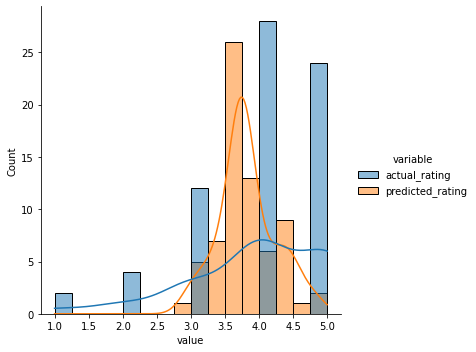

In [64]:
predicted_ratings_for_interacted_items = predict_already_interacted_ratings(df,7,similarity_algo_optimized)
data = predicted_ratings_for_interacted_items.melt(id_vars='business_id', value_vars=['actual_rating', 'predicted_rating'])
sns.displot(data=data, x='value', hue='variable', kde=True);

- We can see that distribution of predicted ratings is closely following the distribution of actual ratings. The total bins for predicted ratings is higher as compared to total bins for actual ratings.
- This is expected, as actual ratings always have discreet values like 1, 2, 3, 4, 5, but predicted ratings can have continuous values as we are taking aggregated ratings from the nearest neighbors of a given user. But over the predictions looks good as compared to the distribution of actual ratings.

**Below we are comparing the predicted ratings by `matrix factorization based recommendation` system against actual ratings for `user_id=4`**

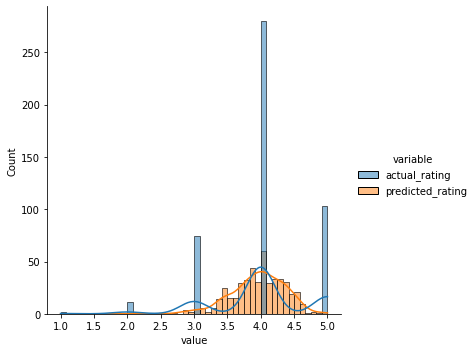

In [65]:
predicted_ratings_for_interacted_items = predict_already_interacted_ratings(df,4, svd_algo_optimized)
data = predicted_ratings_for_interacted_items.melt(id_vars='business_id', value_vars=['actual_rating', 'predicted_rating'])
sns.displot(data=data, x='value', hue='variable', kde=True);

In [66]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df[['user_id', 'business_id', 'rating']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

## **Precision and Recall @ k**

RMSE is not the only metric we can use here. We can also examine two fundamental measures, precision and recall. We also add a parameter k which is helpful in understanding problems with multiple rating outputs.

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. Value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  

**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**Recall** - It is the **fraction of actually relevant items that are recommended to the user** i.e. if out of 10 relevant movies, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision** - It is the **fraction of recommended items that are relevant actually** i.e. if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

See the Precision and Recall @ k section of your notebook and follow the instructions to compute various precision/recall values at various values of k.

To know more about precision recall in Recommendation systems refer to these links : 

https://surprise.readthedocs.io/en/stable/FAQ.html

https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54

In [67]:
from collections import defaultdict
# Function can be found on surprise documentation FAQs
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [68]:
# Make list of k values
# A basic cross-validation iterator.
kf = KFold(n_splits=5)
K = [5, 10]

# Make list of models
models = [algo_knn_user, similarity_algo_optimized,algo_knn_item,similarity_algo_optimized_item, algo_svd, svd_algo_optimized]


for k in K:
    for model in models:
        print('> k={}, model={}'.format(k,model.__class__.__name__))
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        print('-----> Precision: ', round(sum(p) / len(p), 3))
        print('-----> Recall: ', round(sum(r) / len(r), 3))

> k=5, model=KNNBasic
-----> Precision:  0.789
-----> Recall:  0.388
> k=5, model=KNNBasic
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
-----> Precision:  0.782
-----> Recall:  0.385
> k=5, model=KNNBasic
-----> Precision:  0.656
-----> Recall:  0.31
> k=5, model=KNNBasic
-----> Precision:  0.7
-----> Recall:  0.335
> k=5, model=SVD
-----> Precision:  0.785
-----> Recall:  0.365
> k=5, model=SVD
-----> Precision:  0.797
-----> Recall:  0.38
> k=10, model=KNNBasic
-----> Precision:  0.752
-----> Recall:  0.63
> k=10, model=KNNBasic
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done compu

In [69]:
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [70]:
models = [algo_knn_user, similarity_algo_optimized,algo_knn_item,similarity_algo_optimized_item, algo_svd, svd_algo_optimized]
user_name=[]
top_n_pred =[]
for model in models:
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    user_name.append(user)
    top_n_ = top_n[user]
    top_n_pred.append(top_n_)


In [71]:
pd.set_option('max_colwidth', None)
display(pd.DataFrame([user_name,top_n_pred],columns=['algo_knn_user', 'similarity_algo_optimized','algo_knn_item','similarity_algo_optimized_item', 'algo_svd', 'svd_algo_optimized'],index=['user_id','Recommended Restaurants List']).T)

,user_id,Recommended Restaurants List
algo_knn_user,478,"[(1868, 5), (5347, 4.645049229194692), (414, 4.469159361938351), (6279, 4.323394103924216), (2241, 4.313607068797959)]"
similarity_algo_optimized,478,"[(2241, 4.505551526225735), (414, 4.489675294837857), (5833, 4.429896154162005), (5347, 4.311505306632787), (7582, 4.277169942157918)]"
algo_knn_item,478,"[(2878, 3.7228392819591276), (463, 3.7228392819591276), (136, 3.375), (7880, 3.357142857142857), (5510, 3.275)]"
similarity_algo_optimized_item,478,"[(1868, 4.695652173913044), (414, 4.582421461348393), (2241, 4.555382700684505), (6824, 4.0), (6939, 4.0)]"
algo_svd,478,"[(414, 4.160079534286332), (3040, 3.881257433420719), (1868, 3.7956910603980436), (2241, 3.72624667324065), (618, 3.6394317333573376)]"
svd_algo_optimized,478,"[(2241, 3.9251776692461955), (5347, 3.875405887660921), (414, 3.8605926702691633), (8989, 3.8485149750021073), (5924, 3.7601115790455393)]"


**Observations:**

- As expected, we have got the predictions (n=5) for each model. We printed the predictions for One user for each model.The rating values for User-based are between 4-4.3 and for item based fixed at 4-4.2. Matrix Factorization using SVD has values ranging from 3.7-4.2. 

- The Collaborative Models use the user-item-ratings data to find similarities and make predictions rather than just predicting a random rating based on the distribution of the data. This could a reason why the Collaborative filtering performed well.

- Collaborative Filtering searches for neighbors based on similarity of restaurant (example) preferences and recommend restaurant that those neighbors watched while Matrix factorization works by decomposing the user-item matrix into the product of two lower dimensionality rectangular matrices.

- RMSE for Matrix Factorization (0.97) is better than the Collaborative Filtering Models (~1.03).

- Tuning SVD matrix factorization model is not improving the base line SVD much.  

- Matrix Factorization has lower RMSE due to the reason that it assumes that both restaurants and users are present in some low dimensional space describing their properties and recommend a restaurant based on its proximity to the user in the latent space. Implying it accounts for latent factors as well.

### **Conclusions**

In this case study, we saw three different ways of building recommendation systems: 
- rank-based using averages
- similarity-based collaborative filtering
- model-based (matrix factorization) collaborative filtering

We also understood advantages/disadvantages of these recommendation systems and when to use which kind of recommendation systems. Once we build these recommendation systems, we can use **A/B Testing** to measure the effectiveness of these systems.

Here is an article explaining how [Amazon use **A/B Testing**](https://aws.amazon.com/blogs/machine-learning/using-a-b-testing-to-measure-the-efficacy-of-recommendations-generated-by-amazon-personalize/) to measure effectiveness of its recommendation systems.